# Data Cleaning & Exploration on FIFA21 Dataset

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in data

In [2]:
df=pd.read_csv('E:/Data analytics/fifa 21 data/fifa21 raw data v2.csv')

C:\Users\acer\AppData\Local\Temp\ipykernel_9384\1562478712.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('E:/Data analytics/fifa 21 data/fifa21 raw data v2.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

# Data Cleaning

#### Dropping unnecessary columns from df

In [4]:
df.drop(df.iloc[:,22:56], axis=1 ,inplace= True)

In [5]:
df.drop(['photoUrl','playerUrl'], axis=1 ,inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Name            18979 non-null  object
 2   LongName        18979 non-null  object
 3   Nationality     18979 non-null  object
 4   Age             18979 non-null  int64 
 5   ↓OVA            18979 non-null  int64 
 6   POT             18979 non-null  int64 
 7   Club            18979 non-null  object
 8   Contract        18979 non-null  object
 9   Positions       18979 non-null  object
 10  Height          18979 non-null  object
 11  Weight          18979 non-null  object
 12  Preferred Foot  18979 non-null  object
 13  BOV             18979 non-null  int64 
 14  Best Position   18979 non-null  object
 15  Joined          18979 non-null  object
 16  Loan Date End   1013 non-null   object
 17  Value           18979 non-null  object
 18  Wage  

In [7]:
df.head()

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595


#### The Value, Wage and Release Clause columns of df are in currency format and have 'M' and 'K', We need to convert them to numerials

In [8]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M
...,...,...,...
18974,€100K,€1K,€70K
18975,€130K,€500,€165K
18976,€120K,€500,€131K
18977,€100K,€2K,€88K


#### Removing the "€" symbol from the columns

In [9]:
df[df.columns[17:20]] = df[df.columns[17:20]].apply(lambda x: x.str.replace('€',''))
df.iloc[:,17:20]


,Value,Wage,Release Clause
0,103.5M,560K,138.4M
1,63M,220K,75.9M
2,120M,125K,159.4M
3,129M,370K,161M
4,132M,270K,166.5M
...,...,...,...
18974,100K,1K,70K
18975,130K,500,165K
18976,120K,500,131K
18977,100K,2K,88K


#### Changing 'M' and 'K' to numericals

In [10]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    elif 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        else:
            return 1000.0
    elif 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        else:
            return 1000000.0
    else:
        float(x)
        return x

df['Value'] = df['Value'].apply(value_to_float)
df['Wage'] = df['Wage'].apply(value_to_float)
df['Release Clause'] = df['Release Clause'].apply(value_to_float)
df['Value'] = df['Value'].astype('float64')
df['Wage'] = df['Wage'].astype('float64')

In [11]:
df.iloc[:,17:20]

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500.0,165000.0
18976,120000.0,500.0,131000.0
18977,100000.0,2000.0,88000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18979 non-null  int64  
 1   Name            18979 non-null  object 
 2   LongName        18979 non-null  object 
 3   Nationality     18979 non-null  object 
 4   Age             18979 non-null  int64  
 5   ↓OVA            18979 non-null  int64  
 6   POT             18979 non-null  int64  
 7   Club            18979 non-null  object 
 8   Contract        18979 non-null  object 
 9   Positions       18979 non-null  object 
 10  Height          18979 non-null  object 
 11  Weight          18979 non-null  object 
 12  Preferred Foot  18979 non-null  object 
 13  BOV             18979 non-null  int64  
 14  Best Position   18979 non-null  object 
 15  Joined          18979 non-null  object 
 16  Loan Date End   1013 non-null   object 
 17  Value           18979 non-null 

#### Removing new line characters from the Club column and all other columns that may have it

In [13]:
df = df.replace('\n',' ', regex=True)

In [14]:
df.head()

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595


### We see that the Height and Weight columns are not in numerical forms, we have to convert them to float.

#### The Height column has values in both cm and foot-inch we need to convert them all to cm and them make it a float column

In [15]:
for i in df['Height']:
    print(i)

170cm
187cm
188cm
181cm
175cm
184cm
175cm
191cm
178cm
187cm
193cm
175cm
185cm
199cm
193cm
185cm
184cm
173cm
170cm
168cm
176cm
177cm
188cm
188cm
193cm
187cm
175cm
183cm
176cm
180cm
180cm
173cm
178cm
189cm
179cm
188cm
183cm
181cm
185cm
187cm
189cm
187cm
195cm
180cm
172cm
182cm
188cm
185cm
186cm
192cm
173cm
191cm
165cm
191cm
179cm
194cm
191cm
183cm
173cm
167cm
170cm
182cm
191cm
191cm
176cm
188cm
189cm
188cm
186cm
196cm
175cm
184cm
181cm
186cm
183cm
179cm
175cm
180cm
182cm
181cm
180cm
163cm
186cm
183cm
176cm
190cm
191cm
180cm
174cm
183cm
181cm
191cm
190cm
169cm
183cm
187cm
175cm
178cm
180cm
183cm
185cm
190cm
185cm
181cm
174cm
194cm
181cm
179cm
171cm
171cm
195cm
170cm
184cm
190cm
189cm
184cm
185cm
170cm
172cm
188cm
181cm
178cm
187cm
190cm
178cm
177cm
176cm
180cm
174cm
173cm
176cm
172cm
189cm
179cm
179cm
178cm
192cm
189cm
186cm
190cm
185cm
172cm
181cm
180cm
178cm
175cm
177cm
183cm
190cm
173cm
172cm
178cm
188cm
178cm
184cm
189cm
190cm
185cm
182cm
180cm
175cm
172cm
174cm
193cm
184cm
172cm
188c

In [16]:
def parse_ht(ht):
    if "cm" in ht:
        return float(ht[0:3])
    else:
        ht_ = ht.split("'")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return (30.48*ft_) + (2.54*in_)
        
df["Height"]=df["Height"].apply(lambda x:parse_ht(x))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18979 non-null  int64  
 1   Name            18979 non-null  object 
 2   LongName        18979 non-null  object 
 3   Nationality     18979 non-null  object 
 4   Age             18979 non-null  int64  
 5   ↓OVA            18979 non-null  int64  
 6   POT             18979 non-null  int64  
 7   Club            18979 non-null  object 
 8   Contract        18979 non-null  object 
 9   Positions       18979 non-null  object 
 10  Height          18979 non-null  float64
 11  Weight          18979 non-null  object 
 12  Preferred Foot  18979 non-null  object 
 13  BOV             18979 non-null  int64  
 14  Best Position   18979 non-null  object 
 15  Joined          18979 non-null  object 
 16  Loan Date End   1013 non-null   object 
 17  Value           18979 non-null 

#### The Weight column has values in both Kg and lbs we need to convert them all to kg and them make it a float column

In [18]:
for i in df['Weight']:
    print(i)

72kg
83kg
87kg
70kg
68kg
80kg
71kg
91kg
73kg
85kg
92kg
69kg
84kg
96kg
92kg
81kg
82kg
70kg
69kg
70kg
73kg
75kg
86kg
89kg
92kg
89kg
74kg
76kg
73kg
76kg
69kg
64kg
64kg
85kg
69kg
78kg
78kg
76kg
80kg
85kg
76kg
80kg
90kg
69kg
66kg
83kg
82kg
85kg
75kg
82kg
73kg
81kg
60kg
84kg
74kg
85kg
94kg
79kg
67kg
68kg
68kg
80kg
82kg
76kg
78kg
83kg
89kg
80kg
70kg
90kg
75kg
75kg
65kg
81kg
75kg
67kg
70kg
76kg
74kg
75kg
74kg
59kg
81kg
79kg
75kg
82kg
94kg
80kg
70kg
70kg
76kg
86kg
85kg
61kg
74kg
78kg
69kg
72kg
71kg
74kg
79kg
93kg
83kg
79kg
81kg
88kg
71kg
75kg
69kg
73kg
97kg
71kg
76kg
84kg
76kg
75kg
77kg
68kg
65kg
81kg
68kg
74kg
85kg
79kg
73kg
72kg
79kg
78kg
66kg
62kg
67kg
70kg
78kg
67kg
78kg
77kg
80kg
89kg
81kg
84kg
77kg
60kg
73kg
73kg
67kg
71kg
75kg
72kg
80kg
75kg
69kg
78kg
77kg
68kg
74kg
77kg
80kg
86kg
78kg
77kg
73kg
66kg
70kg
78kg
82kg
66kg
80kg
74kg
78kg
67kg
63kg
75kg
68kg
66kg
76kg
88kg
80kg
69kg
76kg
76kg
75kg
69kg
68kg
81kg
70kg
90kg
78kg
77kg
66kg
83kg
82kg
66kg
68kg
66kg
86kg
88kg
80kg
88kg
80kg
80kg


In [19]:
def parse_wt(wt):
    if "kg" in wt:
        return float(wt.split('k')[0])
    else:
        wt_ = wt.split("l")
        lbs_ = float(wt_[0])
        return (0.4535*lbs_)
        
df["Weight"]=df["Weight"].apply(lambda x:parse_wt(x))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18979 non-null  int64  
 1   Name            18979 non-null  object 
 2   LongName        18979 non-null  object 
 3   Nationality     18979 non-null  object 
 4   Age             18979 non-null  int64  
 5   ↓OVA            18979 non-null  int64  
 6   POT             18979 non-null  int64  
 7   Club            18979 non-null  object 
 8   Contract        18979 non-null  object 
 9   Positions       18979 non-null  object 
 10  Height          18979 non-null  float64
 11  Weight          18979 non-null  float64
 12  Preferred Foot  18979 non-null  object 
 13  BOV             18979 non-null  int64  
 14  Best Position   18979 non-null  object 
 15  Joined          18979 non-null  object 
 16  Loan Date End   1013 non-null   object 
 17  Value           18979 non-null 

#### The Joined column is a date column but it is stored as object it has to be converted to datetime format


In [21]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [22]:
df['Joined'] = pd.to_datetime(df['Joined'])

#### The ↓OVA column which shows the overall rating of the player is hard to interact with because of the column name ,thereby changing its name to 'OVR'

In [23]:
df.rename(columns = {'↓OVA':'OVR'}, inplace = True)

# Data Exploration

#### Finding who the best players are at each position

In [24]:
df2=df[["Name",'OVR',"Best Position"]]
df2.loc[df2.groupby('Best Position')['OVR'].idxmax()]


,Name,OVR,Best Position
3,K. De Bruyne,91,CAM
10,V. van Dijk,90,CB
12,Casemiro,89,CDM
15,K. Benzema,89,CF
27,T. Kroos,88,CM
2,J. Oblak,91,GK
32,A. Robertson,87,LB
36,H. Son,87,LM
4,Neymar Jr,91,LW
108,Grimaldo,84,LWB


#### Plotting a scatter plot between the Wage per week and the Value of the player

Text(0, 0.5, 'Wage of the player')

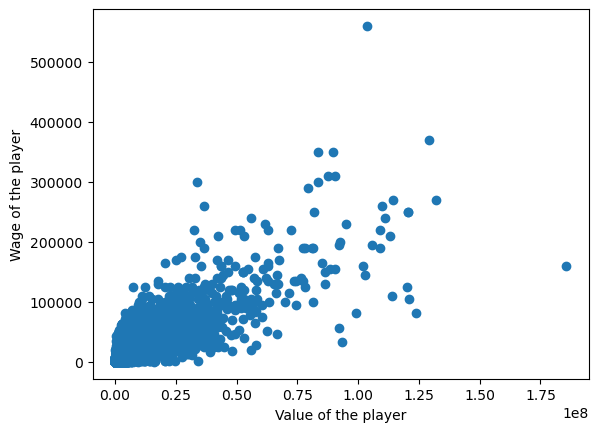

In [25]:
plt.scatter(df["Value"],df['Wage'])
plt.xlabel('Value of the player')
plt.ylabel('Wage of the player')

*From the above plot we can see that most players are at the left bottom as expected but there are two outliers.*

#### The following are the players with the highest market value and are all young talents who can be very valuable to the club in the future.

In [26]:
df.sort_values('Value',ascending=False)[['Name','Wage','Value']].head(10)

,Name,Wage,Value
8,K. Mbappé,160000.0,185500000.0
4,Neymar Jr,270000.0,132000000.0
3,K. De Bruyne,370000.0,129000000.0
29,J. Sancho,82000.0,124000000.0
65,K. Havertz,105000.0,121000000.0
6,M. Salah,250000.0,120500000.0
11,S. Mané,250000.0,120500000.0
2,J. Oblak,125000.0,120000000.0
18,R. Sterling,270000.0,114500000.0
30,T. Alexander-Arnold,110000.0,114000000.0


#### The following are the players having the highest wages and are all Legends of the sport who are nearing the ends of their career

In [27]:
df.sort_values('Wage',ascending=False)[['Name','Wage','Value']].head(10)

,Name,Wage,Value
0,L. Messi,560000.0,103500000.0
3,K. De Bruyne,370000.0,129000000.0
26,E. Hazard,350000.0,89500000.0
15,K. Benzema,350000.0,83500000.0
12,Casemiro,310000.0,90500000.0
27,T. Kroos,310000.0,87500000.0
17,S. Agüero,300000.0,83500000.0
16,Sergio Ramos,300000.0,33500000.0
28,A. Griezmann,290000.0,79500000.0
4,Neymar Jr,270000.0,132000000.0


*From the above two tables we can see that the outlier at the right side of the scatter plot is Kylian Mbappe and the outlier at the top is Lionel Messi.*

#### Now let us look at the players who have a high Market Value but still have low Wages

In [28]:
df['Wage Ratio']=df['Wage']/df['Value']

In [29]:
df['Wage Ratio'][np.isinf(df['Wage Ratio'])] = np.nan

C:\Users\acer\AppData\Local\Temp\ipykernel_9384\3030738688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wage Ratio'][np.isinf(df['Wage Ratio'])] = np.nan


In [30]:
df[['Name','Wage','Value','Wage Ratio']].sort_values('Wage Ratio').head(10)

,Name,Wage,Value,Wage Ratio
373,V. Tsygankov,1000.0,34000000.0,0.000029
372,D. Livaković,900.0,24500000.0,0.000037
1354,V. Mykolenko,700.0,16000000.0,0.000044
346,Ismaily,1000.0,22000000.0,0.000045
697,O. Kolář,850.0,16500000.0,0.000052
2198,A. Hložek,500.0,9500000.0,0.000053
1671,Tete,750.0,12500000.0,0.000060
744,B. Verbič,1000.0,16500000.0,0.000061
588,José Sá,1000.0,16000000.0,0.000063
610,T. Stepanenko,1000.0,14500000.0,0.000069


#### Now let us look at the Players who have stayed at their clubs for the most time 

In [31]:
x= pd.to_datetime("2021-01-01")
df['Tenure'] = x-df['Joined']
df[['Name','Club','Age','Joined','Tenure']].sort_values('Tenure', ascending= False).head(20)

,Name,Club,Age,Joined,Tenure
10264,H. Sogahata,Kashima Antlers,40,1998-01-01,8401 days
4770,Kim Kwang Suk,Pohang Steelers,37,2002-01-01,6940 days
501,I. Akinfeev,PFC CSKA Moscow,34,2002-01-01,6940 days
9948,D. Lewington,Milton Keynes Dons,36,2002-08-01,6728 days
6480,K. Nakamura,Kawasaki Frontale,39,2003-01-01,6575 days
11704,H. Otani,Kashiwa Reysol,35,2003-01-01,6575 days
15530,M. McNulty,Cork City,39,2003-01-01,6575 days
14431,D. Zibung,FC Luzern,36,2003-07-01,6394 days
4038,P. Karlsson,AIK,34,2003-07-01,6394 days
11053,M. Bloomfield,Wycombe Wanderers,36,2003-12-22,6220 days


#### Finding out the players who have stayed at their club for more than 10 years

In [32]:
# importing datetime library to use the timedelta function
import datetime as dt

In [33]:
# Players who have been at their club for more than 10 years
df_loyal=df[['Name','Club','Age','Joined','Tenure']][df['Tenure']>dt.timedelta(3653)].sort_values('Tenure', ascending= False)
df_loyal

,Name,Club,Age,Joined,Tenure
10264,H. Sogahata,Kashima Antlers,40,1998-01-01,8401 days
501,I. Akinfeev,PFC CSKA Moscow,34,2002-01-01,6940 days
4770,Kim Kwang Suk,Pohang Steelers,37,2002-01-01,6940 days
9948,D. Lewington,Milton Keynes Dons,36,2002-08-01,6728 days
11704,H. Otani,Kashiwa Reysol,35,2003-01-01,6575 days
...,...,...,...,...,...
1319,T. Deeney,Watford,32,2010-08-06,3801 days
3370,Z. Erdal,Sivasspor,32,2010-09-01,3775 days
16064,M. Haeder,SC Verl,31,2010-11-01,3714 days
6033,D. Fagundez,New England Revolution,25,2010-11-15,3700 days


#### The top players(OVR>85) who have stayed at their club for more than 10 years

In [34]:
df_loyal[df['OVR']>85]

C:\Users\acer\AppData\Local\Temp\ipykernel_9384\3376529800.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_loyal[df['OVR']>85]


,Name,Club,Age,Joined,Tenure
0,L. Messi,FC Barcelona,33,2004-07-01,6028 days
39,G. Chiellini,Juventus,35,2005-07-01,5663 days
16,Sergio Ramos,Real Madrid,34,2005-08-01,5632 days
55,Piqué,FC Barcelona,33,2008-07-01,4567 days
48,T. Müller,FC Bayern München,30,2008-08-10,4527 days
40,Sergio Busquets,FC Barcelona,31,2008-09-01,4505 days
15,K. Benzema,Real Madrid,32,2009-07-09,4194 days
23,H. Kane,Tottenham Hotspur,26,2010-07-01,3837 days


##### Creating a new dataset called df_best with only the players having OVR over 80

In [35]:
df_best=df[df['OVR']>80]
df_best

,ID,Name,LongName,Nationality,Age,OVR,POT,Club,Contract,Positions,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Wage Ratio,Tenure
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,5 ★,85,92,91,95,38,65,771,0.005411,6028 days
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,5 ★,89,93,81,89,35,77,562,0.003492,906 days
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,3 ★,87,92,78,90,52,90,150,0.001042,2361 days
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,4 ★,76,86,93,88,64,78,207,0.002868,1951 days
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,5 ★,91,85,86,94,36,59,595,0.002045,1247 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,156616,F. Ribéry,Franck Ribéry,France,37,81,81,Fiorentina,2019 ~ 2021,"CF, LM, LW",...,4 ★,74,74,82,86,30,53,93,0.006000,499 days
365,156519,H. Herrera,Héctor Herrera,Mexico,30,81,81,Atlético Madrid,2019 ~ 2022,CM,...,3 ★,71,75,75,76,78,83,90,0.002571,548 days
366,120533,Pepe,Képler Laveran Lima Ferreira,Portugal,37,81,81,FC Porto,2019 ~ 2021,CB,...,4 ★,66,51,60,60,82,85,88,0.002826,724 days
367,205849,E. Andrada,Esteban Andrada,Argentina,29,81,82,Boca Juniors,2018 ~ 2023,GK,...,1 ★,77,79,82,83,44,82,55,0.000950,879 days


#### Finding which club has the most number of high quality players by grouping df_best by Club

In [36]:
df_best_club=df_best.groupby('Club',as_index = False).count().sort_values('ID', ascending = False).head(20)

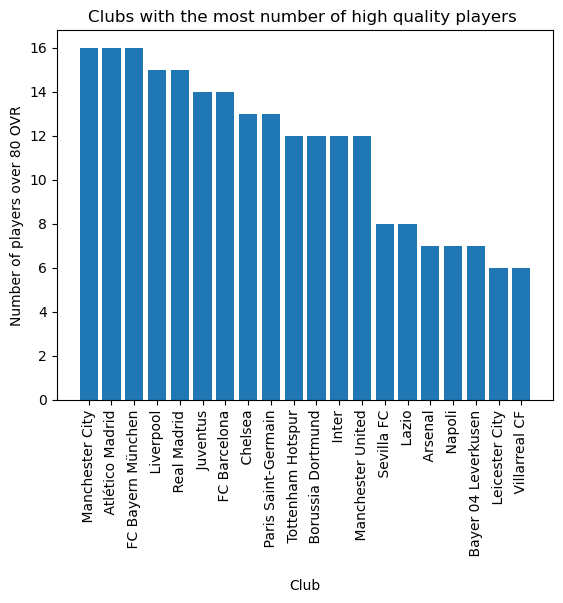

In [37]:
plt.bar('Club','ID',data=df_best_club)
plt.xlabel("Club")
plt.ylabel('Number of players over 80 OVR')
plt.title('Clubs with the most number of high quality players ')
plt.xticks(rotation = 'vertical')
plt.show()


#### Finding out which country has the most number of high quality players by grouping df_best by Nationality


In [38]:
df_best_country=df_best.groupby('Nationality',as_index = False).count().sort_values('ID', ascending = False).head(20)

In [39]:
df_best_country

,Nationality,ID,Name,LongName,Age,OVR,POT,Club,Contract,Positions,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Wage Ratio,Tenure
44,Spain,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
6,Brazil,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,45,47
18,France,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
20,Germany,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2,Argentina,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
16,England,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
36,Portugal,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
26,Italy,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,Belgium,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
32,Netherlands,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


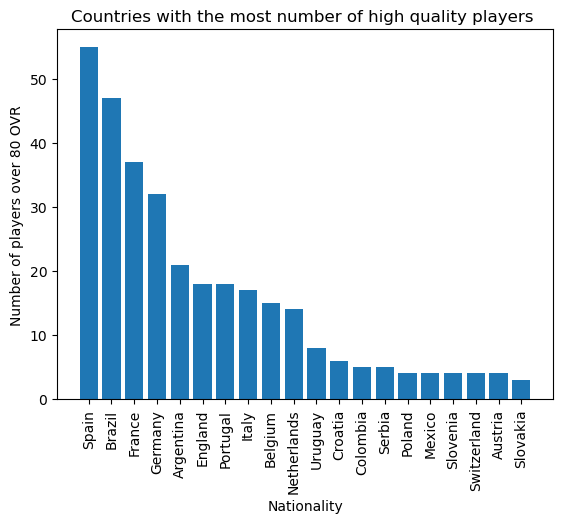

In [40]:
plt.bar('Nationality','ID',data=df_best_country)
plt.xlabel("Nationality")
plt.ylabel('Number of players over 80 OVR')
plt.title('Countries with the most number of high quality players ')
plt.xticks(rotation = 'vertical')
plt.show()

#### Finding out the range of age of the players 

In [41]:
df_age=df.groupby('Age', as_index= False).count()

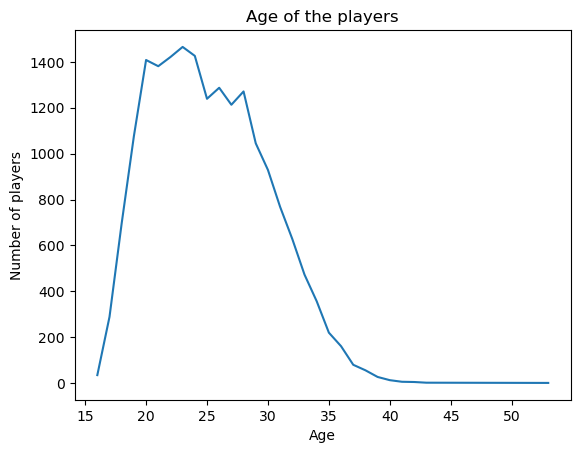

In [42]:
df_age.plot(x='Age',y = 'ID', legend = False)
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Age of the players")
plt.show()

#### Now finding out the range of age of the players who have OVR > 80

In [43]:
df_best_age=df_best.groupby('Age', as_index= False).count()

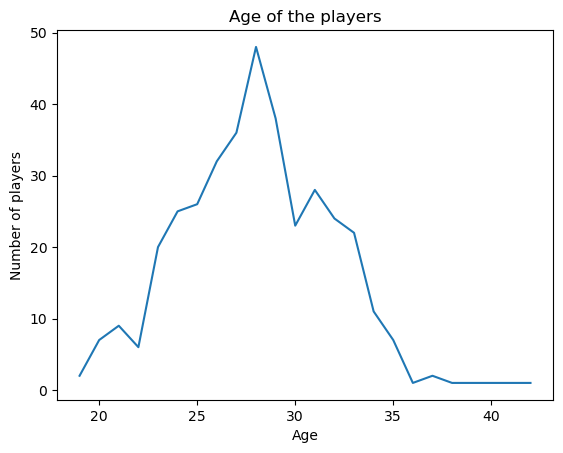

In [44]:
df_best_age.plot(x='Age',y = 'ID', legend = False)
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Age of the players")
plt.show()